In [139]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [140]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [141]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [142]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [143]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables
tablenames = engine.table_names()
tablenames

['measurement', 'station']

In [144]:
measurement = Base.classes.measurement
station = Base.classes.station

In [145]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [146]:

inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [147]:
# Find the most recent date in the data set.
firstdate = session.query(measurement.date).order_by(measurement.date.desc()).first()
session.query(measurement.date).all()

firstdate = str(firstdate).strip("(',)")

firstdate = firstdate.split("-")

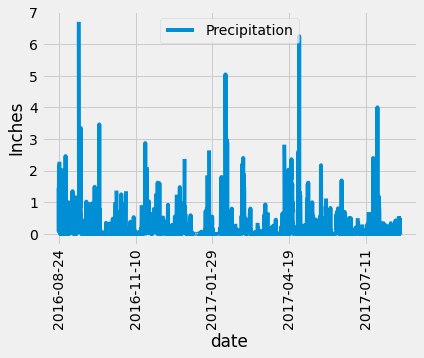

In [148]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
year_ago = dt.date(int(firstdate[0]),int(firstdate[1]),int(firstdate[2])) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
df = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > year_ago).order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(df).set_index('date')

# Sort the dataframe by date
df.sort_values(by='date',inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='line',rot=90)
plt.ylabel("Inches")
plt.legend(["Precipitation"])
plt.show();


In [149]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = round(df.describe(),2)
print("prcp is in inches")
summary

prcp is in inches


,prcp
count,2015.00
mean,0.18
std,0.46
min,0.00
25%,0.00
50%,0.02
75%,0.13
max,6.70


# Exploratory Station Analysis

In [150]:
# Design a query to calculate the total number stations in the dataset
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [152]:
df_station = session.query(measurement.date, measurement.prcp,measurement.station).\
    filter(measurement.date > year_ago).order_by(measurement.date.desc()).all()

In [154]:
df_station = pd.DataFrame(df_station)
df_station

,date,prcp,station
0,2017-08-23,0.00,USC00519397
1,2017-08-23,0.00,USC00514830
2,2017-08-23,0.08,USC00519523
3,2017-08-23,0.45,USC00516128
4,2017-08-22,0.00,USC00519397
...,...,...,...
2218,2016-08-24,2.28,USC00514830
2219,2016-08-24,NaN,USC00517948
2220,2016-08-24,1.22,USC00519523
2221,2016-08-24,2.15,USC00519281


In [160]:
numstations = session.query(station.station, station.id).count()

lastyear_numstations = len(df_station.station.value_counts())

print(f"There are {numstations} stations in the whole \ndataset, {lastyear_numstations} of which had precip \nrecordings in the last year")

There are 9 stations in the whole 
dataset, 7 of which had precip 
recordings in the last year


In [173]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
df_station_summary = pd.DataFrame(df_station.groupby(by='station').date.count())
# List the stations and the counts in descending order.
df_station_summary.sort_values(by='date',ascending=False,inplace=True)
df_station_summary.rename(columns={'date':'Count'},inplace=True)
df_station_summary

,Count
station,
USC00519397,360
USC00519281,351
USC00516128,348
USC00513117,342
USC00519523,336
USC00514830,304
USC00517948,182


In [188]:
maxstation = df_station_summary.index[0]

In [192]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
df_tobs = session.query(measurement.date,measurement.station,measurement.tobs).\
    filter(measurement.date > year_ago).\
    filter(measurement.station == maxstation).order_by(measurement.date.desc()).all()
df_tobs = pd.DataFrame(df_tobs).set_index('date')

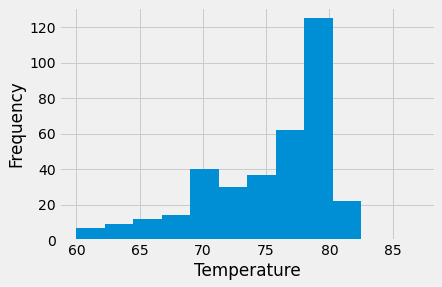

In [200]:
df_tobs.plot(kind='hist',bins=12)
plt.xlabel("Temperature")
plt.legend().remove()
plt.show();

# Close session

In [ ]:
# Close Session
session.close()